<img src="./pics/DL.png" width=110 align="left" style="margin-right: 10px">

# Introduction to Deep Learning

## 03. Neural Networks

---

### What is a neural network?

<img src="./pics/mlp.png" width=300 align="left"/>

##### Nomenclature

As we saw in the previous notebook, a single neuron is not able to solve non-linear problems. But they are not called **networks** for nothing! The power of artificial neural networks lies in their topology.  
If we connect more of the **neurons** we get a (real) neural network (*ANN* or *NN*). The neurons are ordered into **layer**s.  
The first layer is the **input layer** then there are zero, or more **hidden layer**(s), finally there is the **output layer**. Each layer can cosist any number of neurons. Based on the different topologies there are different ANN subtypes.  
The most simple version of ANNs is the multi layer feed forward perceptron network (MLP). 

##### Prediction

The prediction is called a forward propagation as the information travels  through the network from the input layer to the output. Each neuron in the network processes its inputs individually by summing the weighted inputs and transforming it by an activation function. The outputs of neurons in a layer will be the inputs of the neurons on the next layer.
In practice the bias term is included in the weights and a constant input is intorduced each layer to support this inclusion.

##### Training

<img src="./pics/mlp_backprop.jpg" width=300 align="right"/>

The weight updating algorithm is called [**Backpropagation**](https://en.wikipedia.org/wiki/Backpropagation). It basically propagates the errors back to their "root" neuron. So every neuron which was (even slightly) responsible for an error will get their weights updated accordingly. The weight updating equations can be find by calculating the gradient similarly to the Perceptron rules. Backpropagation is similar to [gradient descent rules](https://en.wikipedia.org/wiki/Backpropagation#Derivation).

### How does backpropagation work?

<img src="./pics/mlp_notation.png">

##### Notation

- dataset: $X$
- training sample: $\mathbf{x}^n \in X$, where $\mathbf{x}^n = (X^n_0, \ldots, X^n_N)$
- inputs: $\{x_{0}, \ldots, x_{N}\}$
- weights: $\{w_{i0}, \ldots, w_{iN}\}$
- bias: $b_i$
- activity: $a^n_j = \sum_i w_{ji} X^n_i$
- activation function: $f$
- output: $y^n_j = x^n_{kj} = f(a^n_j) = f \left( \sum_i w_{ji} X^n_i \right)$
- target: $t^n_j$
- error: $e^n_j = t^n_j - y^n_j$
- cost function: $C^n = \frac{1}{2} \sum_j {\left(e^n_j\right)}^2$
- output layer index: $k$

##### Weight update rule

There are two types of neuron weights in the network: the neurons in the output layer, and the neurons on the hidden layers. We will search for an expression which tells us how "guilty" is a weight for an output, we'll call this expression *sensitivity*.

##### Output layer

As a first step, let's find the update rule for the output layer. It is straightforward, since the weights of the output neuron are directly responsible for the error. The error itself is a great measure for sensitivity, let's use it to compute the gradient for the weight changes - we consider the quadratic sum  of errors on the output layer (let's use the index $k$ since we are talking about the output layer) this will be our **cost function**:

$$
    C^n = \frac{1}{2}{\left(\sum_k e^n_k\right)}^2
$$

To find the gradient, we'll differentiate the cost function with respect to $w_{ji}$. We're going to use the chain rule to find it:

$$
    \frac{\partial C^n}{\partial w_{kj}} 
    = \frac{\partial C^n}{\partial e^n_k} 
      \frac{\partial e^n_k}{\partial y^n_k} 
      \frac{\partial y^n_k}{\partial a^n_k} 
      \frac{\partial a^n_k}{\partial w_{kj}}
$$

Let's go through the parts one by one:

$$\begin{align}
    \frac{\partial C^n}{\partial e^n_k}
    & = \frac{\partial \frac{1}{2}{\left(\sum_k  e^n_k \right)}^2}{\partial e^n_k}
    = e^n_k
\\
    \frac{\partial e^n_k}{\partial y^n_k}
    & = \frac{\partial t^n_k - y^n_k}{\partial y^n_k}
    = -1
\\
    \frac{\partial y^n_k}{\partial a^n_k}
    & = \frac{\partial f \left( a^n_k \right)}{\partial a^n_k}
    = f'\left( a^n_k \right)
\\
    \frac{\partial a^n_k}{\partial w_{kj}} 
    & = \frac{\partial}{\partial w_{kj}} \left( \sum_i w_{kj} X_{j} \right)
    = X_j
\end{align}$$

Combining the results will yield:

$$
    \frac{\partial C^n}{\partial w_{kj}}
    = -e^n_k f'\left( a^n_k \right) x^n_{kj}
$$

The error gradient is also referred as *delta* and can be expressed as:

$$\begin{align}
    \delta^n_k 
    & = \frac{\partial C^n}{\partial a^n_k} \\
    & = \frac{\partial C^n}{\partial e^n_k}
        \frac{\partial e^n_k}{\partial y^n_k}
        \frac{\partial y^n_k}{\partial a^n_k} \\
    & = -e^n_k  f'\left( a^n_k \right)
\end{align}$$

Using it we can rewrite our results:

$$
    \frac{\partial C^n}{\partial w_{kj}} = \delta^n_k x^n_{kj}
$$

##### Hidden layers

We'll use the results above to compute the hidden layer's deltas. The errors inside the hidden layers are indirectly computed by back propagating the errors. Consider the previous equation, since: ${\partial C^n}\big/{\partial w_{kj}} = \delta^n_k y_{kj}$. The inputs ($x_{kj}$) of the output layer is the output ($y_j$) of the last hidden layer, so we can say that ${\partial C^n}\big/{\partial w_{kj}} = \delta^n_k y_j$.  
Based on this notation, let's rewrite the error equation as a reminder:

$$\begin{align}
    C^n
    & = \frac{1}{2} \sum_k {\left(e^n_k\right)}^2  \\
    & = \frac{1}{2} \sum_k {\left(t^n_k - y^n_k\right)}^2  \\
    & = \frac{1}{2} \sum_k {\left(t^n_k - f(a^n_k)\right)}^2  \\
    & = \frac{1}{2} \sum_k {\left(t^n_k - f\left(\sum_i w_{kj} x^n_{kj}\right)\right)}^2 \\
    & = \frac{1}{2} \sum_k {\left(t^n_k - f\left(\sum_i w_{kj} y^n_j\right)\right)}^2 \\
    & = \frac{1}{2} \sum_k {\left(t^n_k - f\left(\sum_i w_{kj} f\left(a^n_j\right)\right)\right)}^2 \\
    & = \frac{1}{2} \sum_k {\left(t^n_k - f\left(\sum_i w_{kj} f\left(\sum_i w_{ji} x^n_i\right)\right)\right)}^2 \\
\end{align}$$
 
Using this error, we can calculate the hidden layer's derivate using the chain rule again:

$$
    \frac{\partial C^n}{\partial w_{ji}}
    = \underbrace{
        \left( \sum_k \frac{\partial C^n}{\partial e^n_{k}} 
                      \frac{\partial e^n_{k}}{\partial y^n_{k}} 
                      \frac{\partial y^n_{k}}{\partial a^n_k} 
                      \frac{\partial a^n_k}{\partial y^n_{j}}
        \right)
      }_\text{output neurons} 
      \underbrace{
          \frac{\partial y^n_{j}}{\partial a^n_{j}} 
          \frac{\partial a^n_{j}}{\partial w_{ji}}
       }_\text{hidden neuron}
$$

We have the results from the output layer, let's substitute it:

$$
    \frac{\partial C^n}{\partial w_{ji}} 
    = \left( \sum_k \delta^n_k \frac{\partial a^n_k}{\partial y^n_{j}} \right) 
      \frac{\partial y^n_{j}}{\partial a^n_{j}} 
      \frac{\partial a^n_{j}}{\partial w_{ji}}
$$

Let's deal with the activation value:

$$
    \frac{\partial a^n_k}{\partial y^n_{j}} 
    = \frac{\partial}{\partial y^n_{j}} \left(\sum_j w_{kj} y^n_{j} \right) 
    = w_{kj}
$$

and with the output of the hidden layer:

$$\begin{align}
    \frac{\partial y^n_{j}}{\partial a^n_{j}}
    & = \frac{\partial f\left(a^n_j\right)}{\partial a^n_{j}}
    = f'\left( a^n_j \right)
\\
    \frac{\partial a^n_{j}}{\partial w_{ji}}
    & = \frac{\partial \sum_i w_{ji} x^n_i}{\partial w_{ji}}
    = x_i
\end{align}$$

Putting the results together we get:

$$
    \frac{\partial C^n}{\partial w_{ji}}
    = \left( \sum_k \delta^n_k w_{kj}\right) f'\left( a^n_j \right) x_i
$$

It is really similar to the results in the output layer, let's use the same tehcnique: move the differentiation of the activity to a separate definition called *delta*:

$$\begin{align}
    \delta^n_j 
    & = \frac{\partial C^n}{\partial a^n_k} \\
    & = \left( \sum_k \frac{\partial E^n}{\partial e^n_{k}} 
                      \frac{\partial e^n_{k}}{\partial y^n_{k}} \right) 
        \frac{\partial y^n_{k}}{\partial a^n_k} \\
    & = \left(\sum_k \delta^n_k w_{kj} \right) f'\left( a^n_j \right)
\end{align}$$

So hidden layer's expression changes to:

$$
    \frac{\partial C^n}{\partial w_{ji}} = \delta^n_j x_i
$$

##### Generalization

The differentation above was about a two layer network, so we have to extend and generalize these results. Luckily, observing the final equations, one can notice the similarities, so we create the following rule for computing the *delta*, and therefore the gradient:

$$
    \delta^n_i = \begin{cases}
        e^n_j f'\left( a^n_j \right) \, 
        & \textrm{when neuron $j$ is output} \\
        \left( \sum_j w_{ji} \delta^n_j \right) f'\left( a^n_j \right) 
        & \textrm{when neuron $j$ is hidden},
    \end{cases}
$$

for any layer $i$ followed by $j$. The computed gradient is:

$$
    \frac{\partial C^n}{\partial w_{ji}} = \delta^n_j y_i
$$

### Backpropagation algorithm

#####  1. Forward step:

We use our weights and activation rules to compute the output layer by layer going forward starting from the first, input layer. The output of a neuron in layer $j$ for case $n$ will be calculated as $y^n_j = f \left( w_j y^n_{j - 1} \right)$.


##### 2. Backward step: 

We calculate the error on the output layer, and using backpropagate the error through the network:
- calculate the **output error** $\delta^n$ using $\delta^n_j = e^n_{j + 1} f'\left( a^n_{j + 1} \right)$
- backpropagate the error for every preceding layer $l$: $\delta^n_j = w^n_{j + 1} \delta^n_{j + 1}f'\left( a^n_{j + 1} \right)$
- update weigths using the gradient descent rules: $w_{j} = w_{j} + \alpha \delta^n_j y_{j - 1}$ where $\alpha$ is our learning rate

### In practice

To implement the algorithm, we have to choose an activation function and find its first derivate. 
The tipical activation) functions are the **sigmoid** and the **hyperbolic tangent** function.

##### Sigmoid

<img src="./pics/functions/sigmoid.png" width=400 align="left">

$$\begin{align}
    \sigma(x) & = \frac{1}{1+e^{-x}} \\
    \frac{\partial \sigma(x)}{\partial x} & = \sigma (x)\cdot (1-\sigma(x))
\end{align}$$

<br><br><br><br>

##### Hyperbolic tangent

<img src="./pics/functions/tanh.png" width=400 align="left">

$$\begin{align}
    \tanh(x) & = \frac{1 - e^{-2x}}{1 + e^{-2x}} \\
    \frac{\partial \tanh(x)}{\partial x} & = 1 - \frac{(e^x-e^{-x})^2}{(e^x+e^{-x})^2} = 1 - \tanh^2(x)
\end{align}$$

### Let's try it out!

<img src="./pics/simple_mlp_network.png" width=400>

Let's build a neural network using the rules above. The network topology should include a hidden layer with two neurons, and an output layer with a single neuron, like the one above.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from helpers import plot_results_with_hyperplane

##### Activation functions

In [2]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1. - np.tanh(x) ** 2

# create a mapping to simplify later code snippets
activation_function = {
    'sigmoid': {'f': sigmoid, "f'": sigmoid_prime},
    'tanh': {'f': tanh, "f'": tanh_prime},
}

##### Implement Network

In [35]:
def random_weight(layers, index):
    # number of neurons in prev layer + 1 bias
    input_size = layers[index - 1] + 1
    
    # number of neurons in the actual layer
    extra_bias = int(not index == len(layers) - 1) # + 1 bias if not output layer 
    neuron_count = layers[index] + extra_bias
    
    shape = (input_size, neuron_count)
    
    # 2 * (0 ... 1) - 1 = (-1 ... 1)
    return 2 * np.random.random(shape) - 1


def add_bias(X):
    """Add a bias column to x with 1. values."""
    if X.ndim == 1:
        return np.concatenate(([1], X))
    
    nrows, _ = X.shape
    ones = np.ones((nrows, 1))
    return np.concatenate((ones, X), axis=1)


class NeuralNetwork:
    
    def __init__(self, layers=[2, 2, 1], activation='sigmoid', alpha=0.1):
        self.activation = activation_function[activation]["f"]
        self.activation_prime = activation_function[activation]["f'"]
        
        self.alpha = alpha
    
        # init weights
        self.layers = layers
        self.weights = [random_weight(layers, i) 
                        for i in range(1, len(layers))]
    
    def __str__(self):
        layers = " x ".join(str(l) for l in self.layers)
        return f'NeuralNet[{layers}]'
        
    def forward(self, x):
        nlayers = len(self.weights)
        
        # 0. initialize input
        # a_0 = x
        a = [add_bias(x)]

        # 1. forward step
        # -> a_{j+1} = f(Wa_j)
        for layer in range(nlayers):
            dot_value = np.dot(a[layer], self.weights[layer])
            activation = self.activation(dot_value)
            a.append(activation)
        
        return a

    def delta(self, a, y):
        nlayers = len(self.weights)
        
        # 2. delta calculation
        # 2.a output layer
        # -> e = t - a 
        # -> delta = e * f'(a)
        error = y - a[-1]  # move the -1 multiplyer to the weight update step
        deltas = [error * self.activation_prime(a[-1])]

        # 2.b hidden layers
        # -> delta_j = delta_{j+1} * w_{j+1} * f'(a_{j+1})
        for layer in range(nlayers - 1, 0, -1):
            dot_value = np.dot(deltas[-1], self.weights[layer].T)
            delta = dot_value * self.activation_prime(a[layer])
            deltas.append(delta)

        # 2.c reverse deltas
        # [level3(output) -> level2(hidden)] => [level2(hidden) -> level3(output)]
        deltas.reverse()
        return deltas
        
    def backward(self, a, deltas):
        nlayers = len(self.weights)
    
        # 3. backpropagation
        # -> w_j = w_j + alpha * delta_j * a_{j-1}
        for layer in range(nlayers):
            inputs = np.atleast_2d(a[layer]).T
            delta = np.atleast_2d(deltas[layer])
            self.weights[layer] += self.alpha * np.dot(inputs, delta) # -1 multiplier added here

        
    def fit(self, X, y, epochs=100):
        nrows, nfeats = X.shape
        nlayers = len(self.weights)
            
        for _ in range(epochs):
            for i in range(nrows):
                a = self.forward(X[i])
                deltas = self.delta(a, y[i])
                self.backward(a, deltas)
        
        return self
            
    def predict(self, X): 
        a = add_bias(X)
        for layer in self.weights:
            a = self.activation(np.dot(a, layer))
        return a > 0
    

#### Example Dataset

Let's use the Rosenblatt compatible non-linear `XOR` truth table.

A | B | output |
--|---|--------|
0 | 0 | -1     |
0 | 1 |  1     |
1 | 0 |  1     |
1 | 1 | -1     |

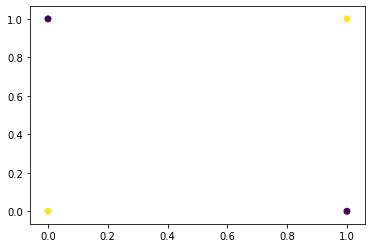

In [4]:
inputs = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
labels = np.array([1, -1, -1, 1])

plt.scatter(x=inputs[:, 0], y=inputs[:, 1], c=labels)

In [8]:
nnet = NeuralNetwork(layers=[2, 2, 1])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


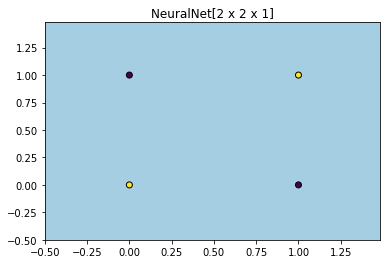

In [9]:
nnet.fit(inputs, labels, epochs=100)
plot_results_with_hyperplane(inputs, labels, nnet, str(nnet));

### Exercise

The previous model failed to learn the presented problem. Let's try to figure out what was the problem!
To rule out the problem, let's use scikit-learn's implementation of the neural network, called `MLPClassifier`.

#### a) Validating the implementation

1. Find and import the model.
2. Initialize with the same parameters we used with our own implementation.
3. Fit the model on the same dataset.
4. Use `plot_results_with_hyperplane` function to show the scikit-learn model's behaviour.

In [10]:
# TODO: 1. import MLPClassifier
from sklearn.neural_network import MLPClassifier

In [19]:
# TODO: 2. initialize with the correct parameters
mlp = MLPClassifier(
    hidden_layer_sizes=(2,), 
    activation='logistic', 
    learning_rate_init=0.1, 
    batch_size=1, 
    max_iter=100)

C:\Users\szige\Anaconda3\envs\ceu_dl\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


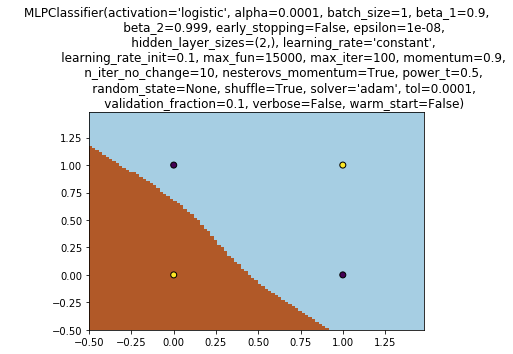

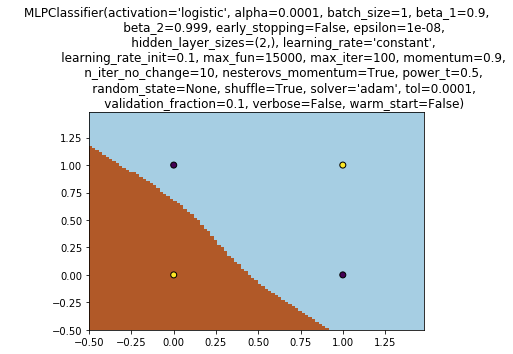

In [29]:
# TODO: 3. Fit the model
mlp.fit(inputs, labels)
plot_results_with_hyperplane(inputs, labels, mlp, str(mlp))

#### b) Answer the following questions:

1. How does the scikit-learn model behave?
2. How would you start to investigate the problem? Why?

#### c) Try a different dataset

Let's take a step back and use the linearly separable problem from before: the truth table of the `AND` logical operator:

A | B | output |
--|---|--------|
0 | 0 | -1     |
0 | 1 | -1     |
1 | 0 | -1     |
1 | 1 |  1     |

1. Reinitialize our model
2. Fit on the dataset 
3. Plot the fitted model's behaviour

In [30]:
# TODO: 1. define dataset
inputs = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
labels = np.array([-1, -1, -1, 1])

In [31]:
# TODO: 2. re-initialize the model
mlp = MLPClassifier(
    hidden_layer_sizes=(2,), 
    activation='logistic', 
    learning_rate_init=0.1, 
    batch_size=1, 
    max_iter=100)

C:\Users\szige\Anaconda3\envs\ceu_dl\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


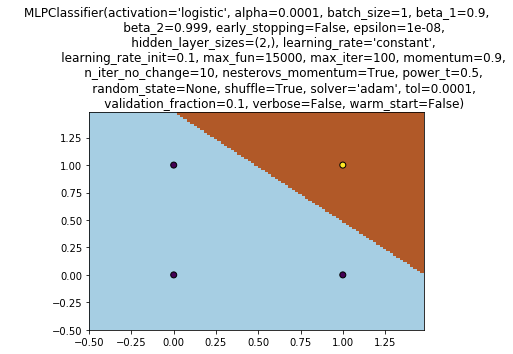

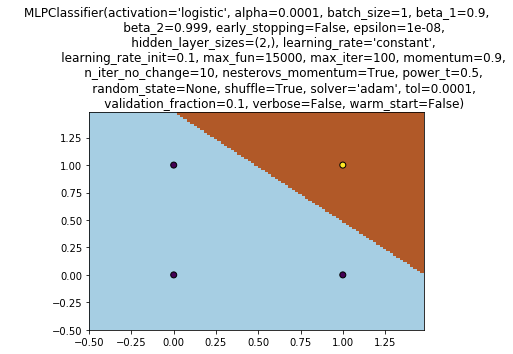

In [32]:
# TODO: 3. Fit the model
mlp.fit(inputs, labels)
plot_results_with_hyperplane(inputs, labels, mlp, str(mlp))

#### d) What was the outcome?

- What was the reason of the failure? 
- Do you know a quick way to fix it?

#### e) Resolve the problem

Hint 1: 
<font color='white'>The problem can be fixed from two direction: either modify the dataset or the network.</font>

Hint 2: <font color='white'>Try to compare the activation function with the expected output.</font>

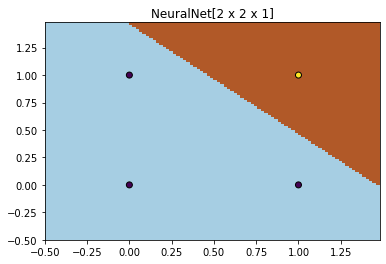

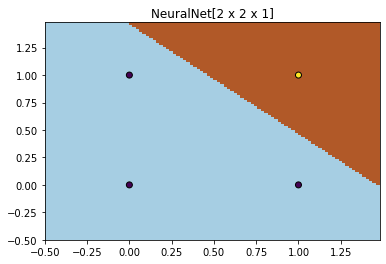

In [37]:
# TODO: Resolve the problem :) 
nnet = NeuralNetwork(activation='tanh').fit(inputs, labels, epochs=1500)
plot_results_with_hyperplane(inputs, labels, nnet, str(nnet))

### Good job!

In the next chapter we'll discover how can we implement and expand the same network using `keras`.